In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm
import dataframe_image as dfi
import xlrd


In [108]:
df_jobs=pd.read_csv("./workforce-jobs-by-sector.csv")

In [111]:
df_diff = df_jobs.groupby("industries").apply(lambda x: x["jobs"].sum() - x["jobs"].iloc[0])

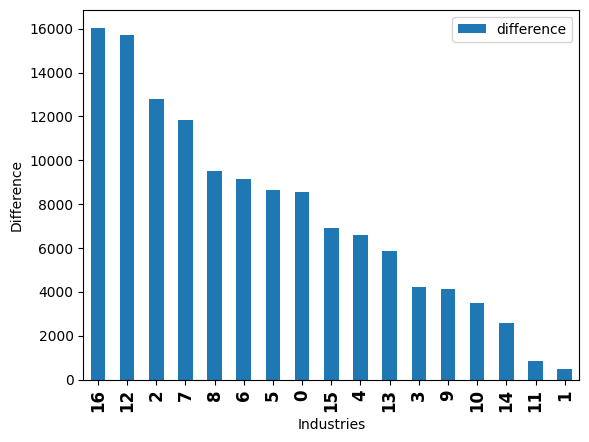

In [93]:
df_diff = df_diff.sort_values(by='difference', ascending=False)
ax = df_diff.plot(kind='bar', xlabel='Industries', ylabel='Difference')
ax.set_xticklabels(df_diff.index, fontproperties=font)
plt.show()

In [106]:
df_diff = df_diff.sort_values(by='difference', ascending=False)

TypeError: Series.sort_values() got an unexpected keyword argument 'by'

In [112]:
df_diff = df_jobs.groupby('industries')['jobs'].sum() - df_jobs.groupby('industries')['jobs'].first().shift(-1)

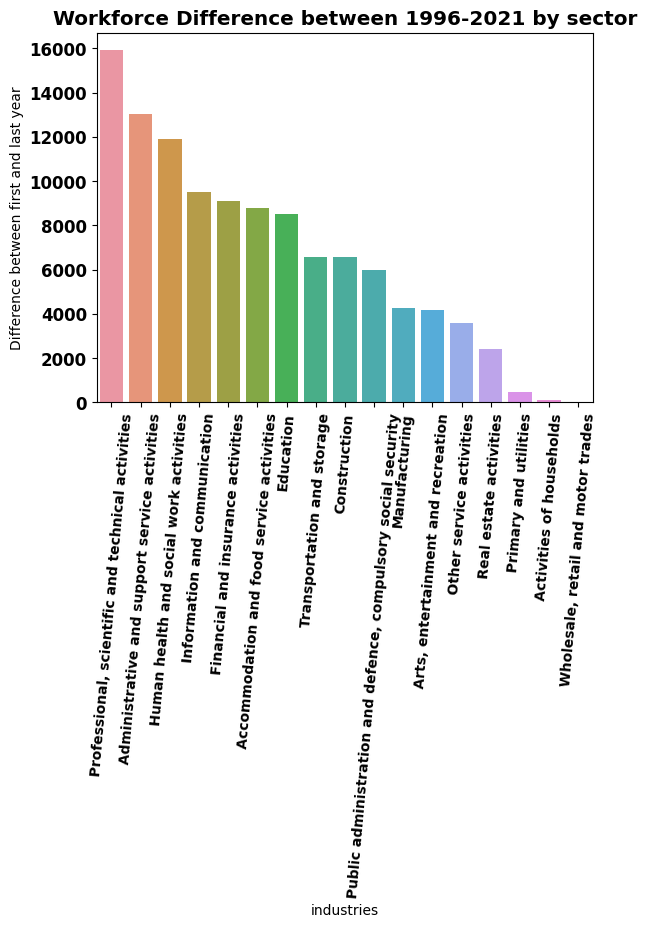

In [119]:
plt.xlabel("Industries")
plt.ylabel("Difference between first and last year")
plt.xticks(rotation=85, fontweight='bold', fontsize='medium')
plt.yticks(fontweight='bold', fontsize='large')
plt.title("Workforce Difference between 1996-2021 by sector", weight='bold', fontsize='x-large')

sns.barplot(x=df_diff.index, y=df_diff.values, order=df_diff.sort_values(ascending=False).index);

In [107]:
df_diff = df_diff.sort_values(by='difference', ascending=False)
df_diff = df_diff.set_index('industries')
sns.barplot(data=df_diff, x=df_diff.index, y='difference')
plt.xlabel("Industries")
plt.ylabel("Difference between first and last year")
plt.xticks(rotation=85, fontweight='bold', fontsize='large')
plt.yticks(fontweight='bold', fontsize='large')
plt.title("Difference between first and last year by sector", weight='bold', fontsize='x-large')
plt.show()


TypeError: Series.sort_values() got an unexpected keyword argument 'by'

In [97]:
plt.figure(figsize=(12,7))
sns.barplot(x=df_diff.index, y='difference', data=df_diff,order=df_diff["Industries"])
plt.xlabel('Industries', fontsize=12, fontweight='bold')
plt.ylabel('Difference', fontsize=12, fontweight='bold')
plt.xticks(rotation=85, fontsize=12, fontweight='bold')
plt.title('Difference between first value and sum of values by sector', fontsize=15, fontweight='bold')
plt.show()


KeyError: 'Industries'

<Figure size 1200x700 with 0 Axes>

In [70]:
df_diff.head()

,industries,difference
0,Accommodation and food service activities,8578
1,Activities of households,470
2,Administrative and support service activities,12807
3,"Arts, entertainment and recreation",4242
4,Construction,6582


In [39]:
df_jobs.head()

,industries,year,jobs
0,Accommodation and food service activities,1996,207
1,Activities of households,1996,16
2,Administrative and support service activities,1996,374
3,"Arts, entertainment and recreation",1996,135
4,Construction,1996,205


In [66]:
df_jobs.tail()

,industries,year,jobs
437,"Professional, scientific and technical activities",2021,836
438,"Public administration and defence, compulsory ...",2021,274
439,Real estate activities,2021,130
440,Transportation and storage,2021,317
441,"Wholesale, retail and motor trades",2021,668


In [27]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   industries  442 non-null    object
 1   year        442 non-null    int64 
 2   jobs        442 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.5+ KB


In [58]:
df_jobs.isnull().sum()

industries    0
year          0
jobs          0
dtype: int64

In [109]:
df_jobs.columns = df_jobs.columns.str.strip()

In [59]:
df_jobs.columns

Index(['industries', 'year ', 'jobs '], dtype='object')

In [ ]:
df_jobs.rename(columns={

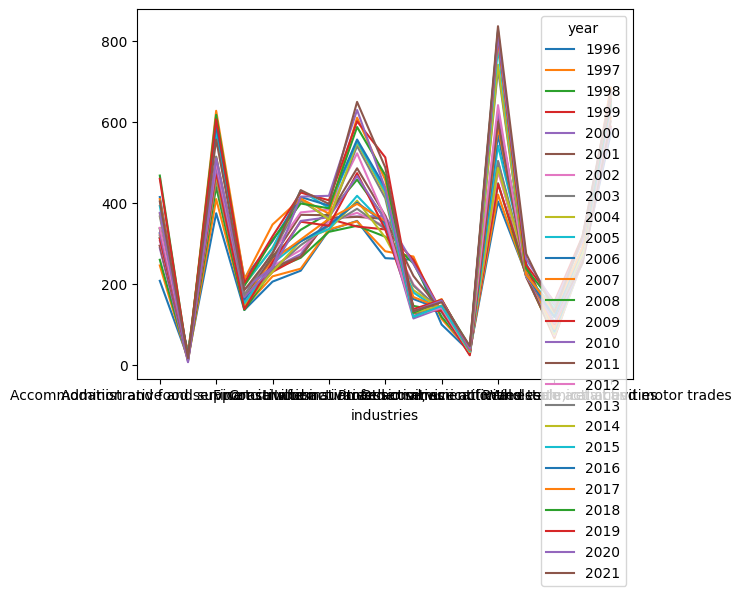

In [30]:
df_jobs.groupby(["industries","year"])["jobs"].sum().unstack().plot()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6312\1517392137.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font)


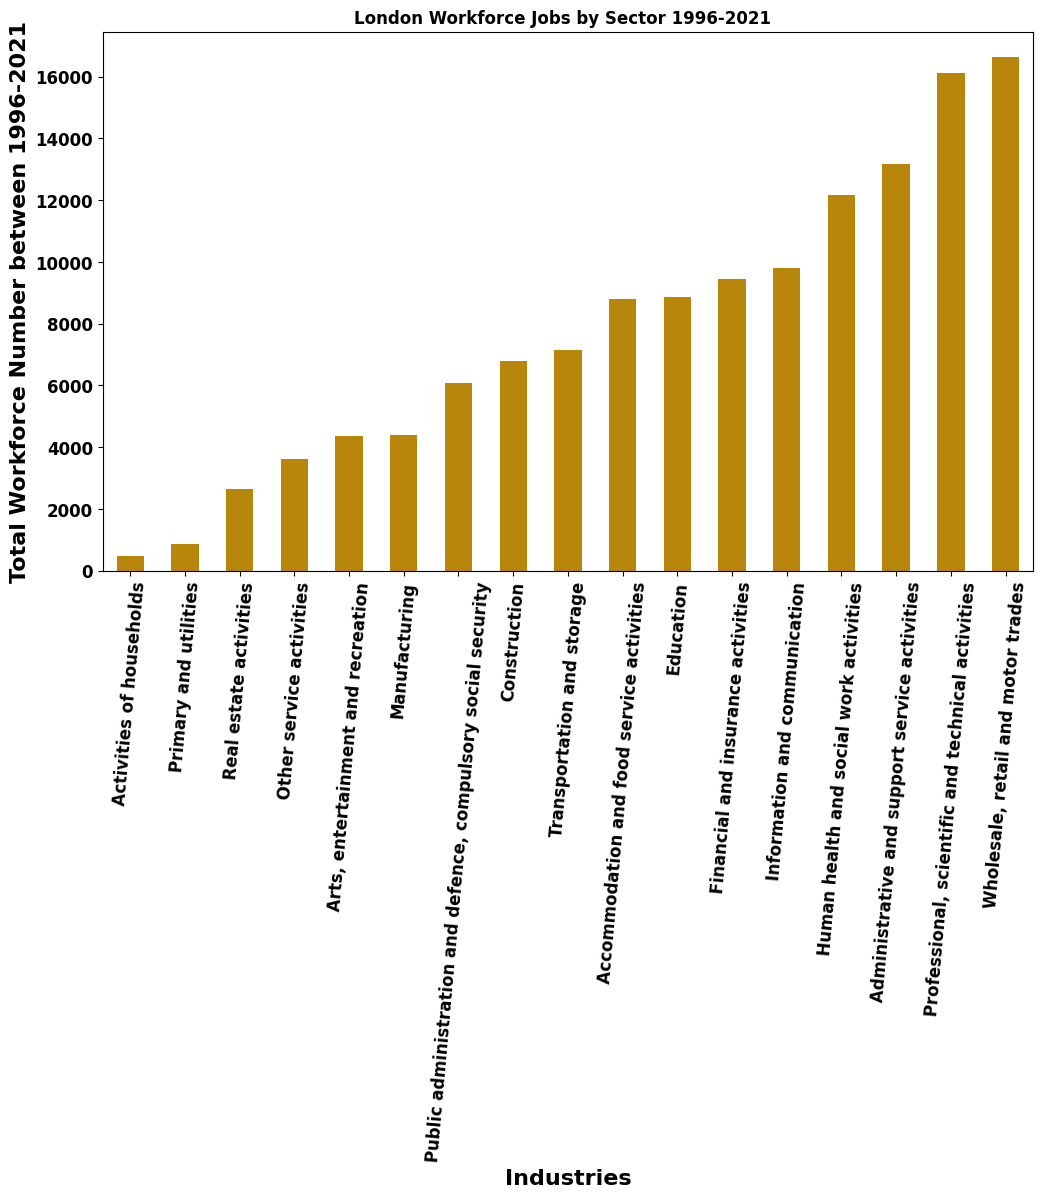

In [48]:
df_jobs = df_jobs.groupby("industries")["jobs"].sum().sort_values()
font = {'size':'12','weight':'bold'}
ax=df_jobs.plot(kind="bar",xlabel="Industries",ylabel="Total Workforce Number between 1996-2021",
figsize=(12,7),color="darkgoldenrod")
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font)
plt.xticks(rotation=85)
plt.title("London Workforce Jobs by Sector 1996-2021  ",weight="bold");
ax.set_xlabel("Industries",fontsize=16, fontweight='bold')
ax.set_ylabel("Total Workforce Number between 1996-2021",fontsize=16, fontweight='bold')
plt.show();

In [33]:
df_jobs

industries
Activities of households                                           486
Primary and utilities                                              860
Real estate activities                                            2652
Other service activities                                          3612
Arts, entertainment and recreation                                4377
Manufacturing                                                     4380
Public administration and defence, compulsory social security     6065
Construction                                                      6787
Transportation and storage                                        7152
Accommodation and food service activities                         8785
Education                                                         8868
Financial and insurance activities                                9460
Information and communication                                     9794
Human health and social work activities                          1

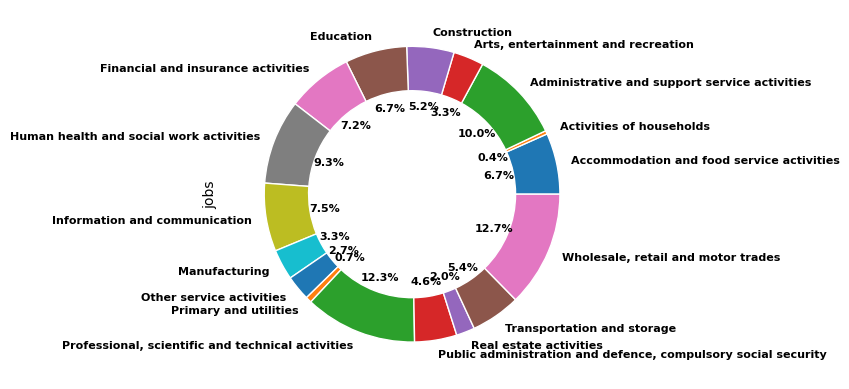

<Figure size 2400x2400 with 0 Axes>

In [52]:

ax=df_jobs.groupby("industries")["jobs"].sum().plot(kind="pie", autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'),
labels = df_jobs.groupby("industries")["jobs"].sum().index, textprops={'weight':'bold','size': 8})
plt.figure(figsize=(24, 24))
ax.set_title('')
plt.show();


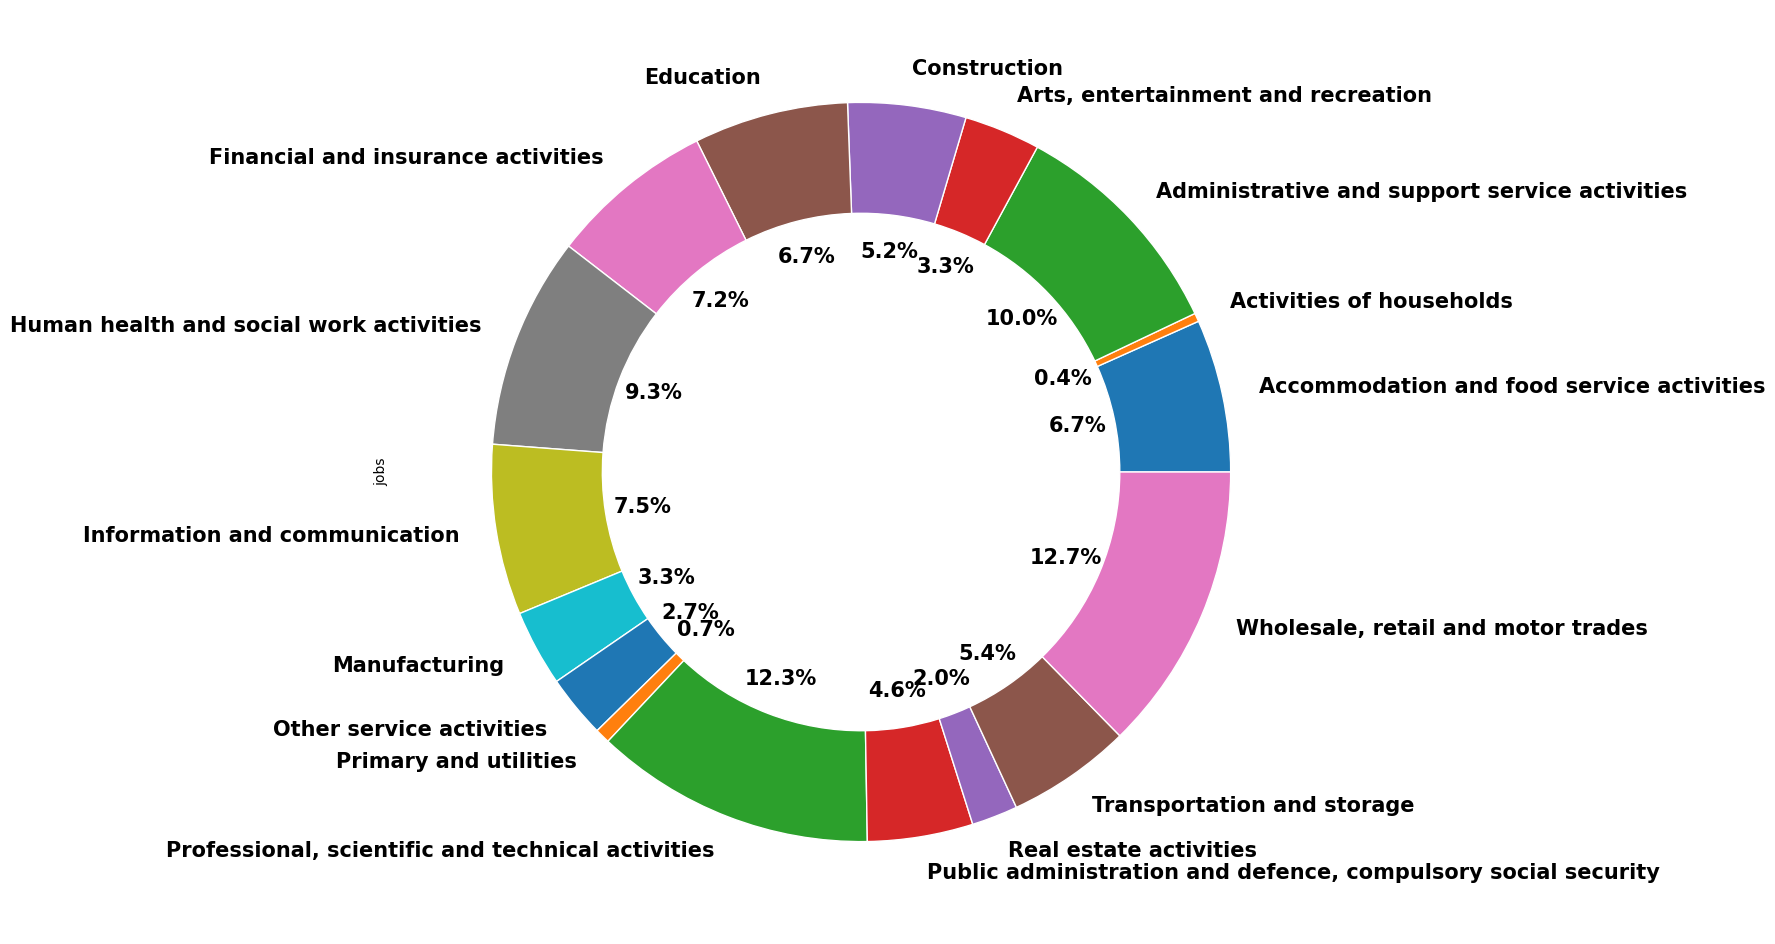

In [53]:
plt.figure(figsize=(12, 12))
ax = df_jobs.groupby("industries")["jobs"].sum().plot(kind="pie", autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), labels = df_jobs.groupby("industries")["jobs"].sum().index, textprops={'weight':'bold','size': 15})
ax.set_title('')
plt.show();

In [ ]:
sns.lineplot(x="industries", y="jobs", hue="year", data=df_jobs)
plt.show()

In [ ]:
sns.lineplot(x="year", y="jobs", hue="industries", data=df_jobs)
plt.yscale('log')
plt.show()

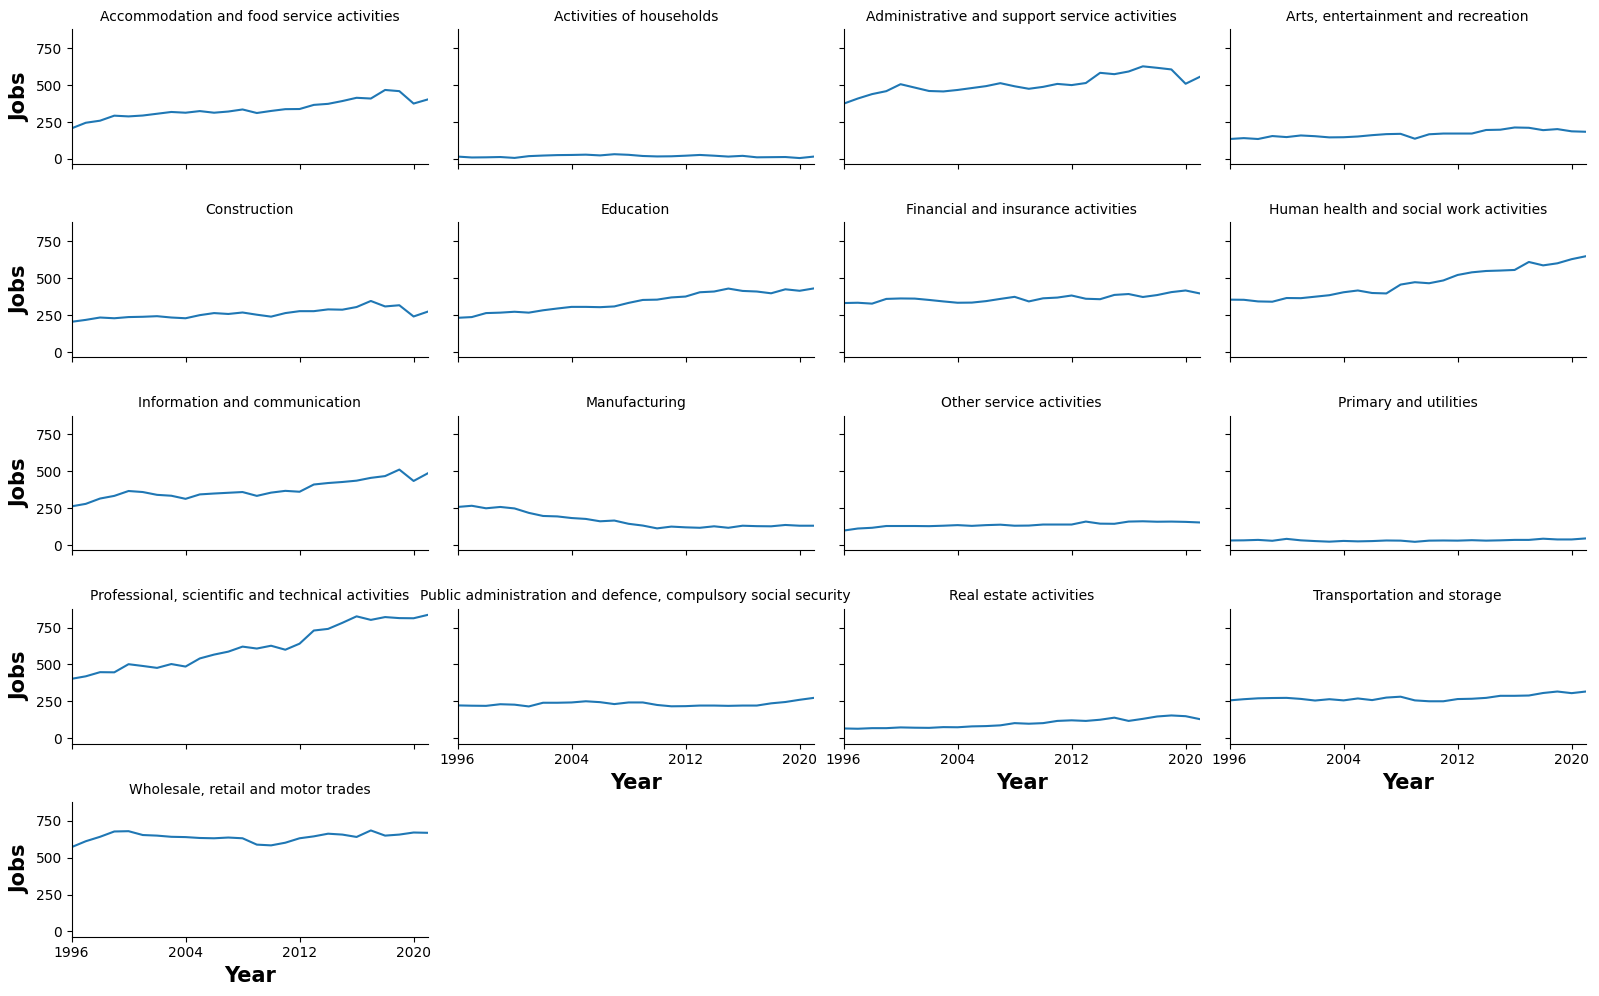

In [54]:
g = sns.FacetGrid(df_jobs, col="industries", col_wrap=4,height=2, aspect=2)
g.map(sns.lineplot, "year", "jobs",legend=False)
g.set_titles("{col_name}")
g.set_xlabels("Year", fontsize=15, weight='bold')
g.set_ylabels("Jobs", fontsize=15, weight='bold')

for ax in g.axes.flat:
    ax.set(xticks=range(min(df_jobs['year']), max(df_jobs['year'])+1, 8), xlim=(min(df_jobs['year']), max(df_jobs['year'])))
    
plt.show()


In [ ]:
Proffessional,scientific and technical activities